In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


import mglearn
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()    
# 한글폰트가 기본적으로 없다.  그래서 따로 등록해서 사용하면 됨
font_name
#(c\windows\fonts  가 기본폰트)

plt.rc('font', family=font_name)

# - 마이너스 표시도 깨진다.
mpl.rcParams["axes.unicode_minus"]=False    #마이너스를 문자로 쓰지 않고 숫자로 쓰겠다. 라는 뜻


import mglearn


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Naive Bayes

    확률의 곱의 법칙
    
    어떤 확률이 발생하기 위해 그 확률이 발생할때 다른 사건 발생확률이 어찌 되는가?
    
    스팸메일 구별할 때 많이 사용함. 
    
    - 선형모델과 유사(Logistic Regression, LinearSVC...)
    - 훈련속도 빠르지만 일반화 성능이 조금 뒤쳐진다. 
    - 확률로 뭔가를 계산할 때 사용하는 알고리즘
    
    - 데이터에 따라 알고리즘이 나뉨
    
        1) 연속적인 데이터일 때 : 가우시안(Gaussian) Naive Bayes
        2) 이산적인 데이터일 때 : 베르누이(Bernoulli) Naive Bayes 또는 MultinomialNB
    - Alpha 파라미터를 통해 복잡도 조절
    
    

### 참고자료 : 나이브베이즈.pdf

    1페이지
    
        과일 세개 중 바나나 뽑을 확률
        과일 세개 중 사과를 뽑을 확률
        
        p : 어떤 사건이 일어날 확률
        
        확률의 합 : 별개의 확률
        
        확률의 곱 : 연속적 일어나거나, 동시에 일어나는 경우        
            조건부 확률 : 어떤 사건이 발생할 때 그 안에서 다른 사건이 발생할 확률
                1) 비올때 우산이 팔릴 확률  : P(A) * P(B|A)
                                                    P(B|A) = P(A B) / P(B)............
            
            
    3페이지
        free라는 단어가 들어갔을 때 스팸메일일 가능성이 있다.
        
        그럴 때 공식들 
        
    4페이지
        10통의 메일중  3통은 스팸메일이다.
        free라는 단어는 4통이다.
        
        free라는 단어가 들어갔어도 스팸은 아니긴 하다.
        
        확률이 어느정도인지  계산해보면
        50%가 나온다.
        
    
        그냥 확률로 계산하면 되는데 이게 머신러닝으로 돌릴만한 일인가?
        
        맞다.
        
        
        왜냐하면 여기서는 free라는 단어로만 예시를 들었지 실질적으론 여러단어로 계산해야되기 때문이다.
        
        
        
    6페이지
        
        그 와중에 coupon이라는 단어가 들어가면 더 스팸이 연관성에 대해 복잡해지므로
        
        계산 식이 복잡해진다. 
        
    7페이지 이후
        코딩 하는 과정

### 실습 1 : iris (연속적인 데이터)
### 가우시안 NB 사용


연속적이기 때문에 가우시안 NB를 써서 테스트

In [2]:
import sklearn
from sklearn.model_selection import train_test_split

iris = sklearn.datasets.load_iris()

# DF화
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df.head()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)


In [4]:
from sklearn.naive_bayes import GaussianNB

In [5]:
# 훈련

model1 = GaussianNB()
model1.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [6]:
pred = model1.predict(X_test)


In [7]:
# 적합도 검사하기 위한 모듈들 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix 

In [8]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.75      0.86      0.80         7
           2       0.92      0.86      0.89        14

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.90        30
weighted avg       0.91      0.90      0.90        30



    setosan은 잘 구별했다. 
    정확도만 따지려면 

In [9]:
accuracy_score(y_test, pred)

0.9

In [10]:
print(confusion_matrix(y_test, pred))

[[ 9  0  0]
 [ 0  6  1]
 [ 0  2 12]]


### 실습 2 : 영화데이터 (이산 데이터)
### 다항 분포 Naive Bayes  ( Multinomial NB)  :  영화리뷰를 이용한 평가 예측



    텍스트마이닝을 해야하는 과정이다.
    그런데 머신러닝에서 숫자데이터를 써야하는데 모든 단어를 분류해서 카운트를 해야한다. 
    그 카운트를 통해 분석, 학습하는 것이다.
    
    우리가 하는 것도 이렇게 해야할지도 모르겠다.

In [20]:
# 데이터 준비

# 훈련용
review_list = [
                {'movie_review': 'this is great great movie. I will watch again', 'type': 'positive'},
                {'movie_review': 'I like this movie', 'type': 'positive'},
                {'movie_review': 'amazing movie in this year', 'type': 'positive'},
                {'movie_review': 'cool my boyfriend also said the movie is cool', 'type': 'positive'},
                {'movie_review': 'awesome of the awesome movie ever', 'type': 'positive'},
                {'movie_review': 'shame I wasted money and time', 'type': 'negative'},
                {'movie_review': 'regret on this move. I will never never what movie from this director', 'type': 'negative'},
                {'movie_review': 'I do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like actors in this movie', 'type': 'negative'},
                {'movie_review': 'boring boring sleeping movie', 'type': 'negative'}
             ]

df = pd.DataFrame(review_list)
df


# 테스트용
test_feedback_list = [
                {'movie_review': 'great great great movie ever', 'type': 'positive'},
                {'movie_review': 'I like this amazing movie', 'type': 'positive'},
                {'movie_review': 'my boyfriend said great movie ever', 'type': 'positive'},
                {'movie_review': 'cool cool cool', 'type': 'positive'},
                {'movie_review': 'awesome boyfriend said cool movie ever', 'type': 'positive'},
                {'movie_review': 'shame shame shame', 'type': 'negative'},
                {'movie_review': 'awesome director shame movie boring movie', 'type': 'negative'},
                {'movie_review': 'do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like this boring movie', 'type': 'negative'},
                {'movie_review': 'aweful terrible boring movie', 'type': 'negative'}
             ]

test_df = pd.DataFrame(test_feedback_list)
test_df["label"] = test_df["type"].map({"positive":1, "negative":0})

In [13]:
df["label"] = df["type"].map({"positive":1, "negative":0})  # map을 쓰면 한번에 바꾸기 용이함

df

,movie_review,type,label
0,this is great great movie. I will watch again,positive,1
1,I like this movie,positive,1
2,amazing movie in this year,positive,1
3,cool my boyfriend also said the movie is cool,positive,1
4,awesome of the awesome movie ever,positive,1
5,shame I wasted money and time,negative,0
6,regret on this move. I will never never what m...,negative,0
7,I do not like this movie,negative,0
8,I do not like actors in this movie,negative,0
9,boring boring sleeping movie,negative,0


In [14]:
# 훈련 데이터, 테스트 데이터 구분
df_x = df["movie_review"]
df_y = df["label"]

In [16]:
# 특성패키지에 텍스트를 추출하는 패키지에 벡터를 세는 함수
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
x_traincv = cv.fit_transform(df_x)
x_traincv  # 10 x 37개의 배열로 만들어짐


# 문자를 숫자로
encoded_input = x_traincv.toarray()
encoded_input

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2,
        0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0

In [17]:
#문자를 숫자로 바꿨으니 숫자를 문자로
cv.inverse_transform(encoded_input[0])  #이렇게 하면 숫자를 다시 문자형태로 바꿔준다. 

[array(['again', 'great', 'is', 'movie', 'this', 'watch', 'will'],
       dtype='<U9')]

In [18]:
# 37개의 단어가 어떻게 되어있는지를 보여주는 함수
cv.get_feature_names()

['actors',
 'again',
 'also',
 'amazing',
 'and',
 'awesome',
 'boring',
 'boyfriend',
 'cool',
 'director',
 'do',
 'ever',
 'from',
 'great',
 'in',
 'is',
 'like',
 'money',
 'move',
 'movie',
 'my',
 'never',
 'not',
 'of',
 'on',
 'regret',
 'said',
 'shame',
 'sleeping',
 'the',
 'this',
 'time',
 'wasted',
 'watch',
 'what',
 'will',
 'year']

In [19]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_traincv, df_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
# 테스트 데이터
test_x = test_df["movie_review"]
test_y = test_df["label"]

In [23]:
# movie_review 데이터도 바꿔준다. 그 후 테스트
x_testcv = cv.transform(test_x)
pred = mnb.predict(x_testcv)

In [25]:
# 정확도 추출

print(accuracy_score(test_y, pred))

1.0


## 실습 3 : 스팸메일 필터
## 베르누이 NB

In [26]:
from sklearn.naive_bayes import BernoulliNB

In [28]:
# 데이터 준비
# 훈련용, 테스트용 

email_list = [
                {'email title': 'free game only today', 'spam': True},
                {'email title': 'cheapest flight deal', 'spam': True},
                {'email title': 'limited time offer only today only today', 'spam': True},
                {'email title': 'today meeting schedule', 'spam': False},
                {'email title': 'your flight schedule attached', 'spam': False},
                {'email title': 'your credit card statement', 'spam': False}
             ]

df = pd.DataFrame(email_list)


test_email_list = [
                {'email title': 'free flight offer', 'spam': True},
                {'email title': 'hey traveler free flight deal', 'spam': True},
                {'email title': 'limited free game offer', 'spam': True},
                {'email title': 'today flight schedule', 'spam': False},
                {'email title': 'your credit card attached', 'spam': False},
                {'email title': 'free credit card offer only today', 'spam': False}
             ]

test_df = pd.DataFrame(test_email_list)

In [29]:


# 데이터 전처리 (긍정, 부정을 숫자로 표현 변경)
df["label"] = df["spam"].map({True:1, False:0})

# 훈련 데이터 준비
df_x = df["email title"]
df_y = df["label"]

# 단어 골라내긔
x_traincv = cv.fit_transform(df_x) # df_x 데이터 변환시키기
encoded_input = x_traincv.toarray()

# 훈련시키기
from sklearn.naive_bayes import BernoulliNB
mnb = BernoulliNB()
mnb.fit(x_traincv, df_y)


# 테스트 데이터 전처리 (긍정, 부정을 숫자로 표현 변경)
test_df["label"] = test_df["spam"].map({True:1, False:0})

# 테스트 데이터 준비
test_x = test_df["email title"]
test_y = test_df["label"]

# 단어 골라내긔 & 예측
x_testcv = cv.transform(test_x)
pred = mnb.predict(x_testcv)
accuracy_score(test_y, pred)

0.8333333333333334

## 비지도 방식

    앞으론 이런 방식이 더 발전하지 않을까 기대하고 있긴한데..
    
    
    우리가 정답을 그 동안 다 알려줬는데 만약 데이터가 엄청 많아진다면 어떻게 할 것인가..
    
    스스로 답을 찾는것이 좀 더 효율적이고 시간을 아낄 수 있지않을까
    
    
    비지도의 주요 모델은
    
        Clustering (군집)

    clustering과 classifier는 비슷한데
    
    차이는 답을 알려주냐 안알려주냐 차이이다. 
    
    clustering의 대표 알고리즘
    
        K-means 알고리즘  (KNN과 다르다)
        
        KNN과 공통점은 L2 norm을 쓴다는 점.
        
        KNN : 이웃과의 거리  (높은 성능과 정확도를 기대하긴 어렵다)
        K-means : 거리로 하는 것은 비슷하다. 다만 엄청 복잡하다. 
    
    

   #### 참고자료 kmeans.pdf
   
        1페이지
            그래프를 보면 데이터가 엄청 흩어져있는데
            어떤 방법을 써야할지 정하기도 어렵다.
            
            1) 처음에 실행단계로는 몇개로 나눌지를 우선 결정한다. 
                k = 군집의 갯수

                    *knn에서는 이웃의 수였다.

            
            2) 
            
            
        3페이지  
          
            3) 중심점 
                세개의 군집으로 나누고 싶으면 k = 3으로 하는데
                
       
        4페이지
            세개로 하면 중심점을 잡을 수 있게 된다.

            세개를 임의의 위치로 놓았을 때 


            중심점 수 = 군집의 수 가 되게 지정해야한다. 


            첫번째 중심점일 때 어디가 가까운지 L2 norm 방식으로 거리 계산을 해서 

            c1이 가장 짧다는 것을 알 수 있음. 그래서 빨간색으로 군집

            두번째 중심점도 같은 방식으로 계산하면 c1이 가까우므로  빨간색으로 군집
                
        5~6 페이지
            이와 같은 방식으로 끝까지 가면
            
            first assignment is done! 한번 끝났다.
            
            
            
        7 페이지    
            그럼 군집이 나눠졌기 때문에
            
            이 각 군집들 사이에서 중심점이 가장 중간위치로 바꾼다.
            
            이렇게 또 위에서 한것처럼 가까운 거리를 찾는걸로 해서 군집이 바뀐다.
            
            
        8~9 페이지 
            위 과정을 반복하는것을 보여준다. 
        
        10 페이지
            이렇게 계속 반복하여서 바뀔게 없어질 때까지 반복해진다.
                
        
        
        * 그래서 중심점을 어디로 초기화 하는지가 제일 중요하다. 
        
        
        중심점을 초기화 하는 방법에는 세가지 방법이 있다. 
            - randomly select centroid : 랜덤 지정, 재수없으면 군집끼리 몰려버리는 경우가 생겨서 잘 쓰지 는다.
            - manually assign centroid : 직접 지정, 수작업도 100% 신뢰할 수 있는 경우는 아니다.
            - k-mean++ : 중심점을 잡고 나머지 데이터를 비교해서 가장 먼 위치에 있는 두번째 중심점을 찾는다.
                         그 다음 먼 것을 세번째 중심점으로 한다. 
            
        
        12페이지 
            k-mean++ 원리 
            
            
        만약 K-means할 때 중심점 옵션을 주지 않으면 기본 k-mean으로 사용한다.
            

# K-means
    - 비지도 군집(Clustering) 알고리즘

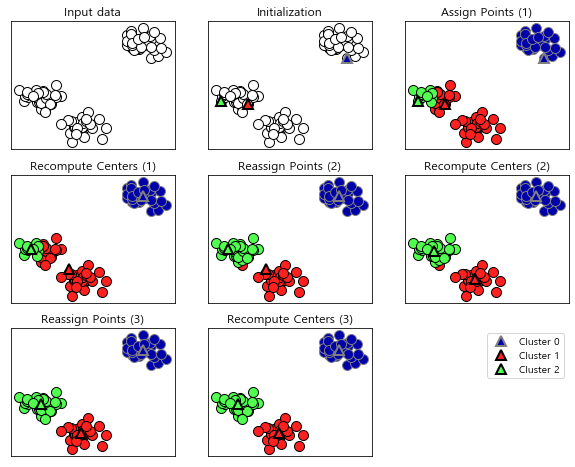

In [30]:
# k-means 설명 
mglearn.plots.plot_kmeans_algorithm()

    처음엔 중심점을 초기화 하고 있다.
    
    그 후 중심점에 가까운 곳끼리 묶고 그 다음
    
    군집 상태에서 중간으로 이동해서 다시 가까운곳끼리 묶는다.
    
    반복 후 최종 모습

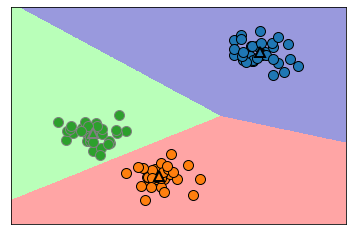

In [31]:
# 최종 결과 
mglearn.plots.plot_kmeans_boundaries()

In [36]:
from sklearn.cluster import KMeans
import sklearn.datasets as datasets

In [37]:
X, y = datasets.make_blobs()

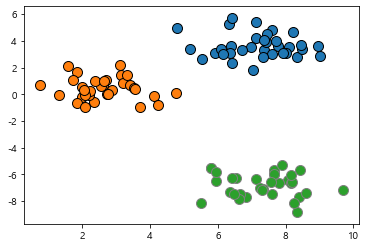

In [42]:
mglearn.discrete_scatter(X[:,0], X[:, 1], y, markers="o")

In [40]:
# 훈련시키기

km = KMeans(n_clusters=3).fit(X)

# 앞에 훈련용, 뒤에 정답
# 그런데 kmean은 정답을 안줘도 된다.

In [43]:
# 얘가 스스로 찾은 label(정답)이다
lbl = km.labels_

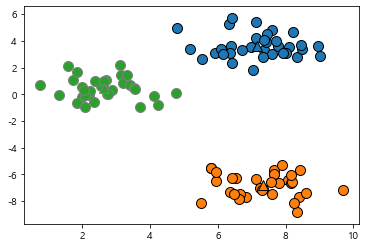

In [46]:
# 위 결과를 label 기준으로 그려보자
mglearn.discrete_scatter(X[:,0],X[:,1], lbl,  markers="o")

# 마지막 중심점 위치도 뽑아보자
mglearn.discrete_scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], [0,1,2], markers="^")

    값을 똑같이 찾아냈다. 
    중심점도 각 군집의 중앙임을 확인할 수 있다.

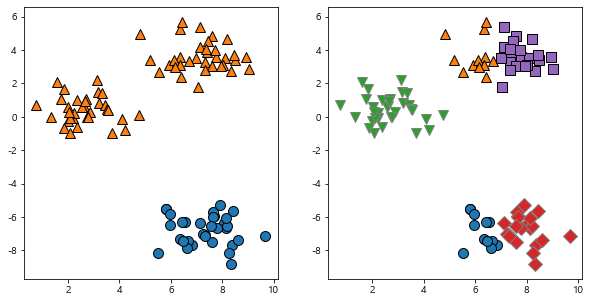

In [48]:
fig, axes = plt.subplots(1,2, figsize=(10,5))  #그래프 (1행 2열)두개 
idx = 0
for k in [2, 5] :  #처음엔 2라는 값으로, 그다음 5라는 값으로 반복
    km = KMeans(n_clusters=k).fit(X)
    lbl = km.labels_
    mglearn.discrete_scatter(X[:,0],X[:,1], lbl, ax=axes[idx])
    idx += 1

In [50]:
KMeans().fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

    max_iter = 300 까지 계산한다.
    클러스터 개수는 기본 8
    precomute_distances = auto  : 거리계산은 자동으로 K-mean을 사용한다. 

## 실습 1 : iris
    K-Mean 

In [52]:
# 데이터 준비 
# iris
iris = sklearn.datasets.load_iris()

# DF화
X = pd.DataFrame(iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(iris.target, columns = ["target"])

X.head()
# y.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0.5, 1.0, '꽃잎')

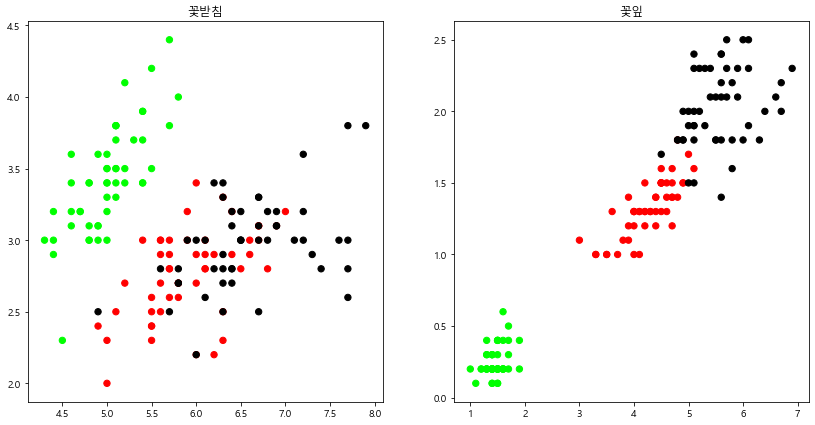

In [54]:
colormap = np.array(["lime", "red", "black"])
plt.figure(figsize=(14,7))
plt.subplot(1, 2, 1)
plt.scatter(X.sepal_length, X.sepal_width, c= colormap[y.target], s = 40)
plt.title("꽃받침")



plt.subplot(1, 2, 2)
plt.scatter(X.petal_length, X.petal_width, c= colormap[y.target], s = 40)
plt.title("꽃잎")


    iris에서 petal이 특성이 좋기 때문에 그동안 petal로만 했었다.
    이 그래프를 통해서 좀 더 확실하게 꽃받침보다 꽃잎이 좋다는 것을 알게 되었다.
    

In [55]:
# 훈련시키기  //  정답을 넘겨주지 않는다. 
model = KMeans(n_clusters=3).fit(X)

In [56]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Text(0.5, 1.0, '결과')

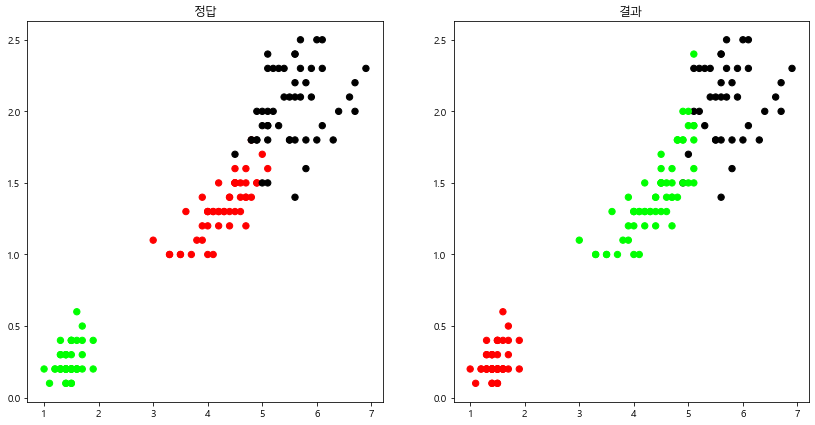

In [57]:
colormap = np.array(["lime", "red", "black"])
plt.figure(figsize=(14,7))
plt.subplot(1, 2, 1)
plt.scatter(X.petal_length, X.petal_width, c= colormap[y.target], s = 40)
plt.title("정답")



plt.subplot(1, 2, 2)
plt.scatter(X.petal_length, X.petal_width, c= colormap[model.labels_], s = 40)
plt.title("결과")


In [61]:
accuracy_score(y, model.labels_)

0.24

In [59]:
confusion_matrix(y, model.labels_)

array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]], dtype=int64)

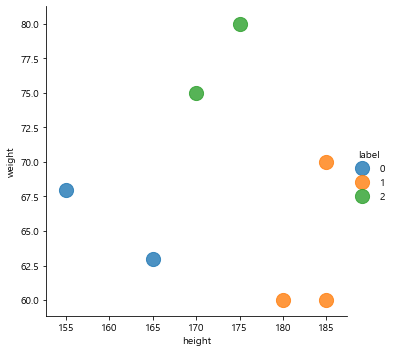

In [67]:
df = pd.DataFrame(columns=['height', 'weight'])
df.loc[0] = [185,60]
df.loc[1] = [180,60]
df.loc[2] = [185,70]
df.loc[3] = [165,63]
df.loc[4] = [155,68]
df.loc[5] = [170,75]
df.loc[6] = [175,80]

model = KMeans(n_clusters=3).fit(df.values)
df["label"] = model.labels_
sns.lmplot("height", "weight", data=df, fit_reg=False, scatter_kws={"s":200}, hue = "label")

 ## 실습 : 타이타닉 (생존자 예측)
     
     머신러닝
     
     www.kaggle.com
     - 경진대회로 주로 많이 쓰이고
     - 데이터 하는 사람들에겐 성지

    -  로그인을 하고 나서 https://www.kaggle.com/c/titanic
    
        data 받기
        
        

In [3]:
# 데이터 준비
train = pd.read_csv("data/titanic/train.csv")
test = pd.read_csv("data/titanic/test.csv")

# 데이터 차이가 있다 test.scv파일에는 Survived의 정답이 없다.
# 그래서 측정해서 kaggle에 올리면 kaggle에 정답이 있어서 그걸로 채점해준다.

In [4]:
train.info()

#전처리

train.isnull().sum()
test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 탐색적 데이터 분석 
    - Pclass
    - Sex
    - SibSp
    - Parch
    - Embarked
    - Cabin

In [5]:
# feature를 넘기면 막대그래프를 그리는 함수 생성
def bar_chart(feature) :
    survived = train[train["Survived"]==1][feature].value_counts()
    dead =  train[train["Survived"]==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ["Survived", "Dead"]
    df.plot(kind="bar", stacked=True, figsize=(10, 5))

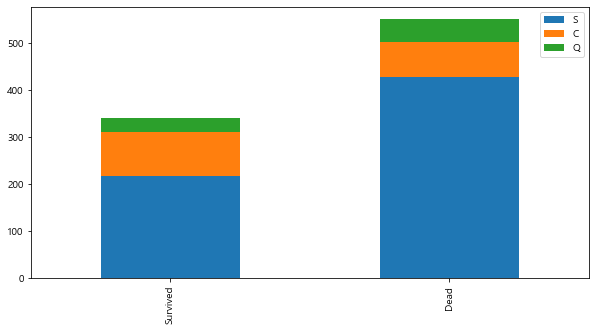

In [6]:
bar_chart("Embarked")

## Feature Engineering

In [7]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


    여기서 보면 이름을 무시할 수 있다.
    그런데 이름에서도 쓸만한 데이터가 있긴 있다. 바로 Mr, Miss 로 성별이 파악이 되긴하다.
    
   

In [8]:
# 이름 추출 : Mr, Miss, Mrs

# 훈련용데이터와 테스트용 데이터를 하나로 합쳐서 처리하자. 

train_test_data = [train, test]

for dataset in train_test_data :
    dataset["Title"] = dataset["Name"].str.extract(" ([A-Za-z]+)\.")

In [9]:
train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Ms            1
Capt          1
Sir           1
Countess      1
Mme           1
Jonkheer      1
Don           1
Lady          1
Name: Title, dtype: int64

In [10]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3, "Rev":3, "Major":3, "Mile":3, "Col":3,
                "Lady":3, "Don":3, "Mme":3, "Jonkheer":3, "Ms":3, "Capt":3, "Countess":3}


for dataset in train_test_data :
    dataset["Title"] = dataset["Title"].map(title_mapping)

In [11]:
train.drop("Name", axis = 1, inplace=True)
test.drop("Name", axis = 1, inplace=True)

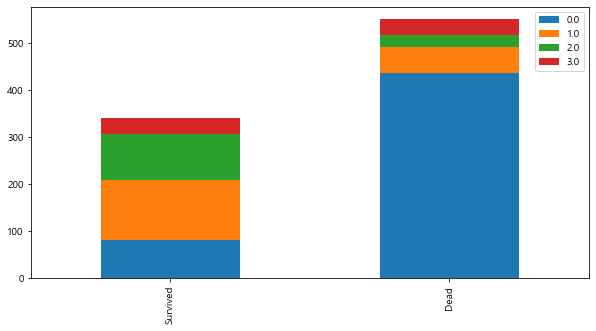

In [12]:
bar_chart("Title")

    Mr 가 엄청 많이 죽었음을 알 수 있다.

In [13]:
# 성별에 대한 숫자화

for dataset in train_test_data :
    dataset["Sex"] = dataset["Sex"].map({"male":0, "female":1})

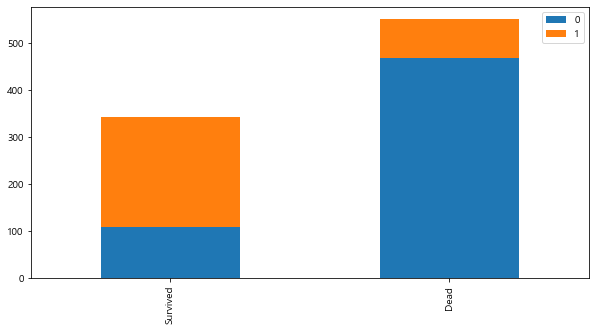

In [14]:
# 확인

bar_chart("Sex")

In [15]:
# Age에 대한 Binning
# child:0, young:1, adult:2, mid-age:3, senior:4

# 결측치 처리 : 남자들은 남자들의 평균나이, Mrs는 Mrs의 평균나이, Miss는 Miss의 평균나이
# 이걸로 결측치를 예측해서 그냥 채워 넣자

# 이 값이 다 들어가면 안되고 결측치에만 들어가야함.
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)

In [16]:
train.isnull().sum()
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            1
dtype: int64

    결측치가 Age에 사라졌음을 확인하였다. 

In [17]:
# Binning   Age의 실제값은 사실 필요없다. 
for dataset in train_test_data :
    dataset.loc[dataset["Age"] < 16, "Age"] = 0
    dataset.loc[(dataset["Age"] >= 16) & (dataset["Age"] < 26), "Age"] = 1
    dataset.loc[(dataset["Age"] >= 26) & (dataset["Age"] < 36), "Age"] = 2
    dataset.loc[(dataset["Age"] >= 36) & (dataset["Age"] < 62), "Age"] = 3
    dataset.loc[dataset["Age"] >= 62, "Age"] = 4
    

In [18]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,0,4.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,S,2.0


In [19]:
# Embarked

train.isnull().sum()
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            1
dtype: int64

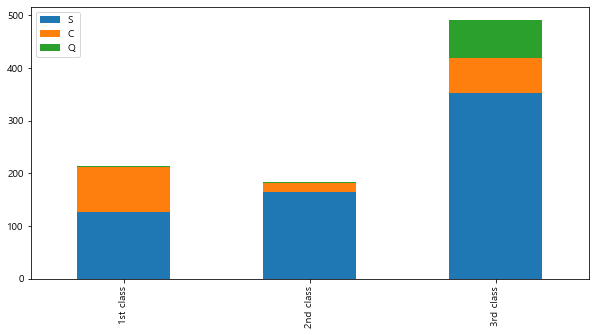

In [20]:
p1 = train[train["Pclass"]==1]["Embarked"].value_counts()
p2 = train[train["Pclass"]==2]["Embarked"].value_counts()
p3 = train[train["Pclass"]==3]["Embarked"].value_counts()

df = pd.DataFrame([p1, p2, p3])
df.index = ["1st class", "2nd class", "3rd class"]
df.head()
df.plot(kind="bar", stacked = True, figsize=(10,5))

In [21]:
# Embarked 결측치는 S로 채워준다.
train["Embarked"] = train["Embarked"].fillna("S")

In [22]:
train.isnull().sum() # 결측치 없음을 확인하기 

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            3
dtype: int64

In [23]:
for dataset in train_test_data:
    dataset["Embarked"] = dataset["Embarked"].map({"S":0, "C":1, "Q":2})

In [24]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,2,0.0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,0,2.0
2,894,2,0,4.0,0,0,240276,9.6875,NaN,2,0.0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,0,0.0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,0,2.0


In [25]:
# Fare

train.isnull().sum()
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            1
dtype: int64

In [26]:
# 객실 등급을 이용하여 Fare 결측치 채움
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [27]:
test["Fare"].isnull().sum() # 결측치 처리 확인

0

In [28]:
for dataset in train_test_data:
    dataset.loc[dataset["Fare"]<=17, "Fare"] = 0
    dataset.loc[(dataset["Fare"]>17) & (dataset["Fare"]<=30), "Fare"] = 1
    dataset.loc[(dataset["Fare"]>30) & (dataset["Fare"]<=100), "Fare"] = 2
    dataset.loc[(dataset["Fare"]>100), "Fare"] = 3

In [29]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,0.0,NaN,2,0.0
1,893,3,1,3.0,1,0,363272,0.0,NaN,0,2.0
2,894,2,0,4.0,0,0,240276,0.0,NaN,2,0.0
3,895,3,0,2.0,0,0,315154,0.0,NaN,0,0.0
4,896,3,1,1.0,1,1,3101298,0.0,NaN,0,2.0


In [30]:
# Cabin

train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
F2             3
F33            3
              ..
B50            1
B41            1
E68            1
E38            1
D49            1
Name: Cabin, Length: 147, dtype: int64

In [31]:
for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].str[:1]

In [32]:
train.head()
test.tail()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
413,1305,3,0,2.0,0,0,A.5. 3236,0.0,NaN,0,0.0
414,1306,1,1,3.0,0,0,PC 17758,3.0,C,1,NaN
415,1307,3,0,3.0,0,0,SOTON/O.Q. 3101262,0.0,NaN,0,0.0
416,1308,3,0,2.0,0,0,359309,0.0,NaN,0,0.0
417,1309,3,0,1.0,1,1,2668,1.0,NaN,1,3.0


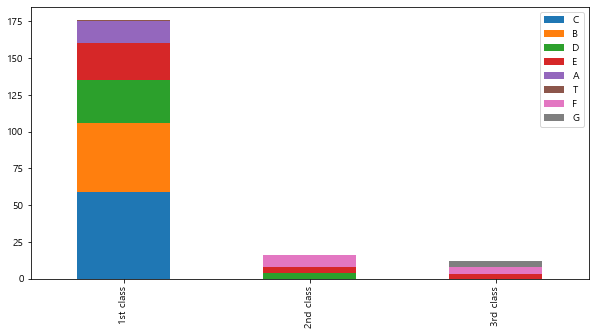

In [33]:
Pclass1 = train[train["Pclass"]==1]["Cabin"].value_counts()
Pclass2 = train[train["Pclass"]==2]["Cabin"].value_counts()
Pclass3 = train[train["Pclass"]==3]["Cabin"].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ["1st class", "2nd class", "3rd class"]
df.plot(kind="bar", stacked=True, figsize=(10, 5))

In [34]:
cabin_mapping = {"A":0, "B":0.4, "C":0.8, "D":1.2, "E":1.6, "F":2, "G":2.4, "T":2.8}

for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].map(cabin_mapping)

In [35]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [36]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,0.0,2.0,2,0.0
1,893,3,1,3.0,1,0,363272,0.0,2.0,0,2.0
2,894,2,0,4.0,0,0,240276,0.0,2.0,2,0.0
3,895,3,0,2.0,0,0,315154,0.0,2.0,0,0.0
4,896,3,1,1.0,1,1,3101298,0.0,2.0,0,2.0


In [37]:
# 동승자 컬럼 합치기
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1 # + 1 : 동승자 여부 , 최소값 1 
test["FamilySize"] = test["SibSp"] + train["Parch"] + 1

In [38]:
# 확인
train["FamilySize"].value_counts()
test["FamilySize"].value_counts()

1.0     213
2.0     127
3.0      52
4.0      13
5.0       6
7.0       3
6.0       1
13.0      1
10.0      1
8.0       1
Name: FamilySize, dtype: int64

In [39]:
# 불필요 컬럼 삭제
features_drop = ["Ticket", "SibSp", "Parch"]
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

In [40]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0.0,1.0
1,893,3,1,3.0,0.0,2.0,0,2.0,2.0
2,894,2,0,4.0,0.0,2.0,2,0.0,1.0
3,895,3,0,2.0,0.0,2.0,0,0.0,1.0
4,896,3,1,1.0,0.0,2.0,0,2.0,2.0


In [41]:
train = train.drop(["PassengerId"], axis=1)

In [42]:
train_data = train.drop("Survived", axis=1)
target = train["Survived"]

In [43]:
print(train_data.shape, target.shape)

(891, 8) (891,)
